## Breast Cancer (Machine Learning from history)
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

#### Predict diagnosa by using classification

by: Hendrik Lesmana

### 1) Import libraries (Basic libraries like Pandas, numpy, and visualization)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
print("Data.shape: ", df.shape)

Data.shape:  (569, 33)


- There isn't test data
- So, only train data which gives "diagnosis"

I'm going to make a prediction accuracy based on this dataset by dropping diagnosis column

In [29]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The dataset has already set in the data types

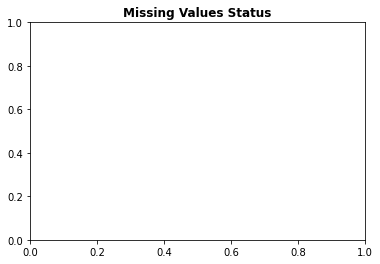

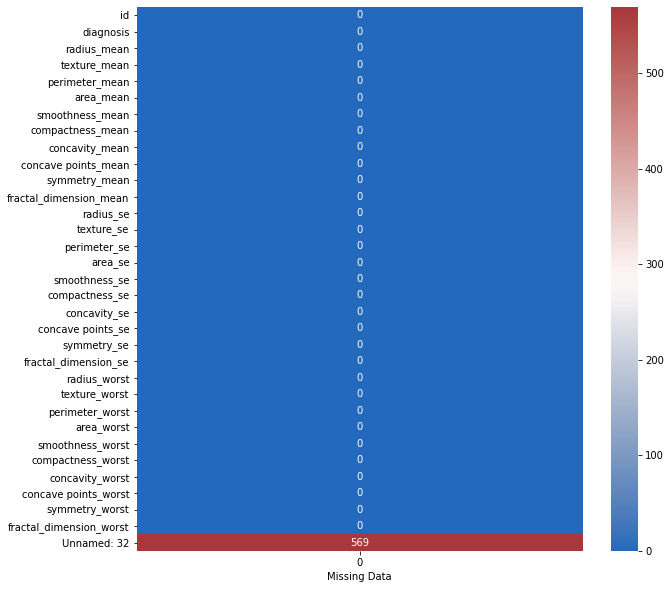

Data.shape:  (569, 33)


In [30]:
plt.title('Missing Values Status', fontweight='bold')
plt.figure(figsize=(10,10))    
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='vlag', )
ax.set_xlabel('Missing Data')
plt.show()
print("Data.shape: ", df.shape)

I don't think 'Unnamed: 32' is part of the data, literally 569/569 are NaN

In [31]:
df.drop('Unnamed: 32', axis=1, inplace=True)

B    357
M    212
Name: diagnosis, dtype: int64


c:\users\hendrik\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


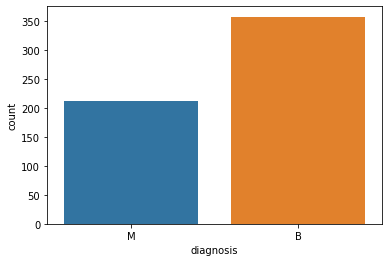

In [32]:
sns.countplot(df['diagnosis'])
print(df.diagnosis.value_counts())

In [33]:
df["diagnosis"] = [1 if i.strip() == "M" else 0 for i in df.diagnosis] 

In [34]:
corr_matrix = df.corr()

**Variables in the dataset are synchronized**

So, i'm gonna use correlation for efficient time saving
- Threshold >0.75 means i'm going to use a correlation with high value


- 0.00 - 0.19 = Very Bad
- 2.00 - 3.44 = Bad
- 4.00 - 5.99 = Normal
- 6.00 - 7.99 = Good
- 8.00 - 1.00 = Awesome!!

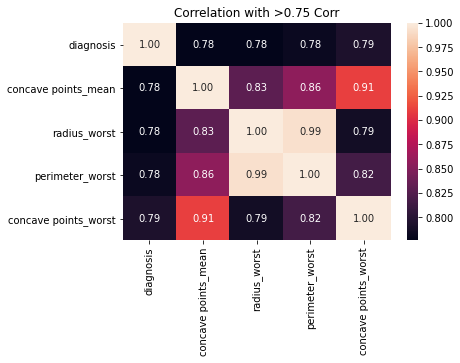

In [35]:
threshold = 0.75
filter = np.abs(corr_matrix['diagnosis']) > threshold
corr_features = corr_matrix.columns[filter].tolist()
sns.heatmap(df[corr_features].corr(), annot=True, fmt='.2f')
plt.title("Correlation with >0.75 Corr")
plt.show()

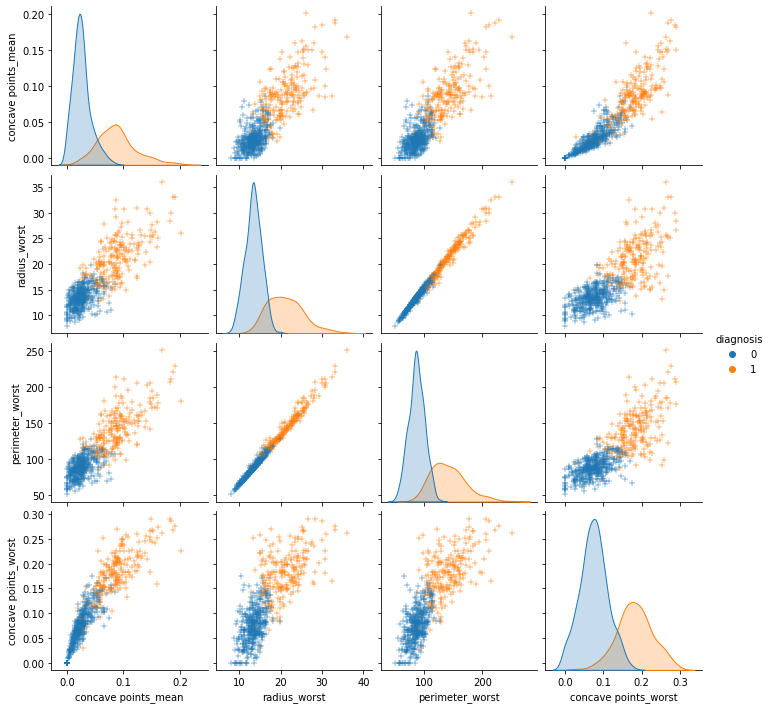

In [36]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis")
plt.show()

### 2) Import Machine Learnign libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [38]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [39]:
prediction_var = ['concave points_mean','radius_worst','perimeter_worst','concave points_worst']

In [40]:
train_X = train[prediction_var]
train_y=train.diagnosis

test_X= test[prediction_var]
test_y =test.diagnosis

In [43]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X,train_y)
prediction = random_forest.predict(test_X)
rf = metrics.accuracy_score(prediction,test_y)
rf

0.935672514619883

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X,train_y)
Y_pred = decision_tree.predict(test_X)
dt = metrics.accuracy_score(Y_pred,test_y)
dt

0.9298245614035088

In [45]:
c_knn = KNeighborsClassifier(n_neighbors = 1)
c_knn.fit(train_X,train_y)
Y_pred = c_knn.predict(test_X)
c_knn.score(train_X,train_y)
knn = metrics.accuracy_score(Y_pred,test_y)
knn

0.9122807017543859

In [47]:
svc = SVC()
svc.fit(train_X, train_y)
Y_pred = svc.predict(test_X)
svc.score(train_X,train_y)
svc_s = metrics.accuracy_score(Y_pred,test_y)
svc_s

0.9415204678362573

### 3) Predict Test set

In [48]:
models = pd.DataFrame({
    'Model':['RandomForest','Decision Tree','KNN','SVC'],
    'Score':[rf,dt,knn,svc_s]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,SVC,0.941520
0,RandomForest,0.935673
1,Decision Tree,0.929825
2,KNN,0.912281


In [49]:
diag = pd.DataFrame({
        "Id": test["id"],
        "Diagnosa": Y_pred
    })

In [50]:
diag

,Id,Diagnosa
467,9113514,0
390,90317302,0
561,925311,0
110,864033,0
315,894089,0
...,...,...
363,9010872,1
170,87139402,0
4,84358402,1
559,925291,0


- 1 Means "malignant
- 0 Means "benign"